# <font color='magma'> **Train Deep Learning Model (DenseNet201)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the Data
image_data = np.load('/content/drive/MyDrive/Hands Dataset/images.npy')
labels = np.load('/content/drive/MyDrive/Hands Dataset/labels.npy')

In [ ]:
image_data.shape

(6360, 64, 32, 3)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Normalize the image data
image_data = image_data / 255.0

In [ ]:
X = image_data
y = labels

In [ ]:
import random
random.seed(42)

The DenseNet201 model is initialized with pre-trained weights and trained for regression. Data is split 80:20 into training and testing sets. Custom layers are added for regression prediction. The model is compiled using Adam optimizer and MSE loss. Rsquared score is included as a custom metric. It's trained for 15 epochs with a batch size of 32 and evaluated on validation data. Finally, its performance is assessed using MSE, RMSE, R squared score, and test loss.

In [ ]:
# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=0, stratify=labels)

In [ ]:
# Build the DenseNet Model
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(64, 32, 3))

# Add custom layers for regression
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1)(x)

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
import tensorflow.keras.backend as K

# Define R^2 Score as a custom metric
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

# Compile the Model with MSE loss and R^2 Score metric
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=[r_squared])

In [ ]:
# Train the Model
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
159/159 [==============================] - 117s 154ms/step - loss: 35.9247 - r_squared: -6.0631 - val_loss: 74.2145 - val_r_squared: -13.6654
Epoch 2/15
159/159 [==============================] - 20s 127ms/step - loss: 1.9606 - r_squared: 0.6092 - val_loss: 29.4127 - val_r_squared: -4.7956
Epoch 3/15
159/159 [==============================] - 22s 135ms/step - loss: 1.1685 - r_squared: 0.7614 - val_loss: 12.7435 - val_r_squared: -1.4973
Epoch 4/15
159/159 [==============================] - 22s 140ms/step - loss: 1.0704 - r_squared: 0.7843 - val_loss: 20.8061 - val_r_squared: -3.0918
Epoch 5/15
159/159 [==============================] - 20s 126ms/step - loss: 1.1782 - r_squared: 0.7621 - val_loss: 25.2300 - val_r_squared: -3.9670
Epoch 6/15
159/159 [==============================] - 21s 132ms/step - loss: 1.0042 - r_squared: 0.7984 - val_loss: 11.7983 - val_r_squared: -1.3082
Epoch 7/15
159/159 [==============================] - 21s 130ms/step - loss: 0.8424 - r_squared: 0.826

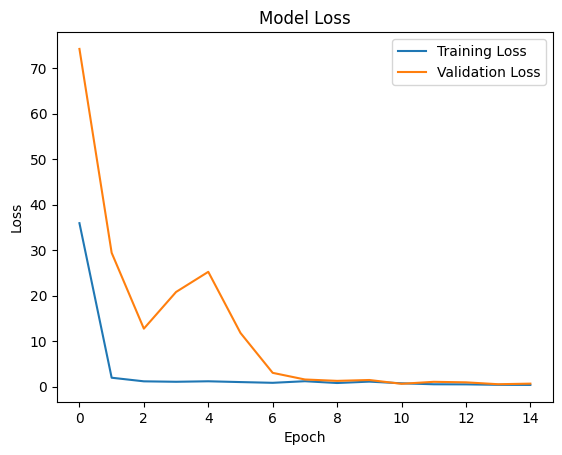

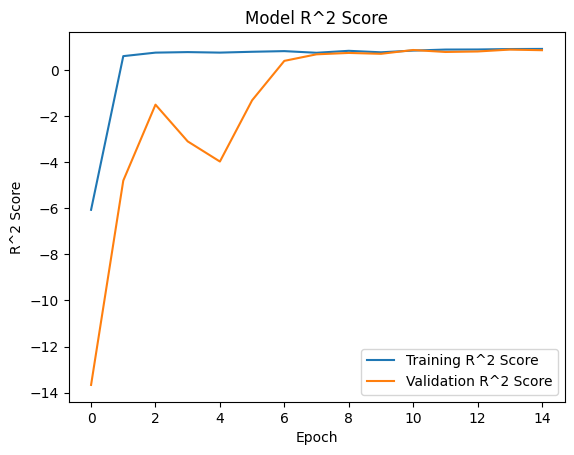

In [ ]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation R^2 Score
plt.plot(history.history['r_squared'], label='Training R^2 Score')
plt.plot(history.history['val_r_squared'], label='Validation R^2 Score')
plt.title('Model R^2 Score')
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

In [ ]:
# Evaluate the Model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

40/40 [==============================] - 1s 32ms/step - loss: 0.6621 - r_squared: 0.8665
Test Loss: [0.6620698571205139, 0.8664860725402832]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R^2 Score
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

40/40 [==============================] - 4s 30ms/step
Mean Squared Error (MSE): 0.6620698177534963
Root Mean Squared Error (RMSE): 0.8136767280397641
R^2 Score: 0.8738914632850483
